<h1><center>CODE DELIVERABLES</center></h1>

## All Figures from the paper are replicated and some are even extended, for the exteneded version explaination or intuition is given and mentioned exteneded as well

In [65]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import poisson

**Generating Network**

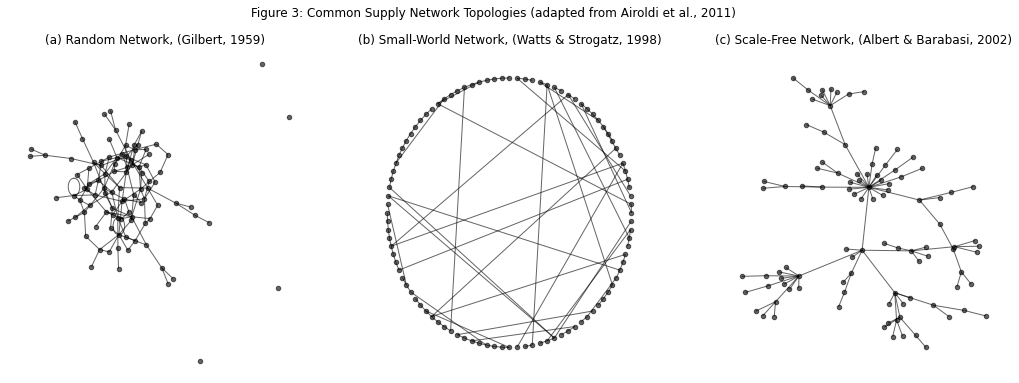

In [26]:
# Define node count and parameters
n_nodes = 100
avg_degree = 3

# Random Network (Configuration Model)
degree_sequence = poisson(avg_degree).rvs(n_nodes)

# Ensure even sum of degrees for configuration model
if sum(degree_sequence) % 2 != 0:
    degree_sequence[0] += 1  # Adjust degree of the first node to ensure even sum

G_random = nx.configuration_model(degree_sequence)
G_random = nx.Graph(G_random)  # Convert to undirected graph

# Small-World Network (Watts-Strogatz model)
k = avg_degree  # Number of neighbors to rewire
p = 0.3  # Probability of rewiring
G_small_world = nx.watts_strogatz_graph(n_nodes, k, p, seed=42)

# Scale-Free Network (Barabási-Albert model)
m = avg_degree // 2  # Number of new edges per new node
G_scale_free = nx.barabasi_albert_graph(n_nodes, m, seed=42)

# Create subplots and display networks
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Adjust layout for better visualization
pos_random = nx.fruchterman_reingold_layout(G_random, seed=42)
pos_small_world = nx.circular_layout(G_small_world)
pos_scale_free = nx.fruchterman_reingold_layout(G_scale_free, seed=42)

node_size = 20  # Adjust node size for clarity
alpha_value = 0.6 # Adjust edge transparency

axs[0].set_title("(a) Random Network, (Gilbert, 1959)")
nx.draw(G_random, pos=pos_random, node_size=node_size, node_color='black', alpha=alpha_value, ax=axs[0])

axs[1].set_title("(b) Small-World Network, (Watts & Strogatz, 1998)")
nx.draw(G_small_world, pos=pos_small_world, node_size=node_size, node_color='black', alpha=alpha_value, ax=axs[1])

axs[2].set_title("(c) Scale-Free Network, (Albert & Barabasi, 2002)")
nx.draw(G_scale_free, pos=pos_scale_free, node_size=node_size, node_color='black', alpha=alpha_value, ax=axs[2])

plt.suptitle("Figure 3: Common Supply Network Topologies (adapted from Airoldi et al., 2011)")
plt.show()

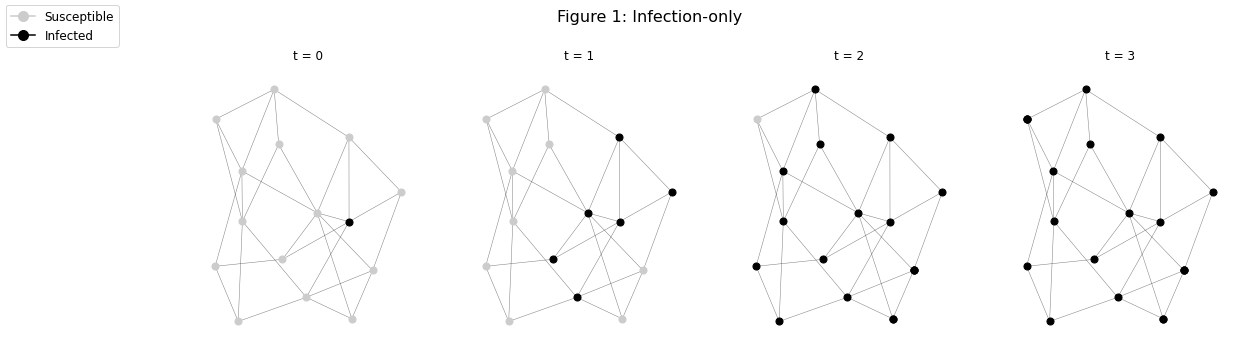

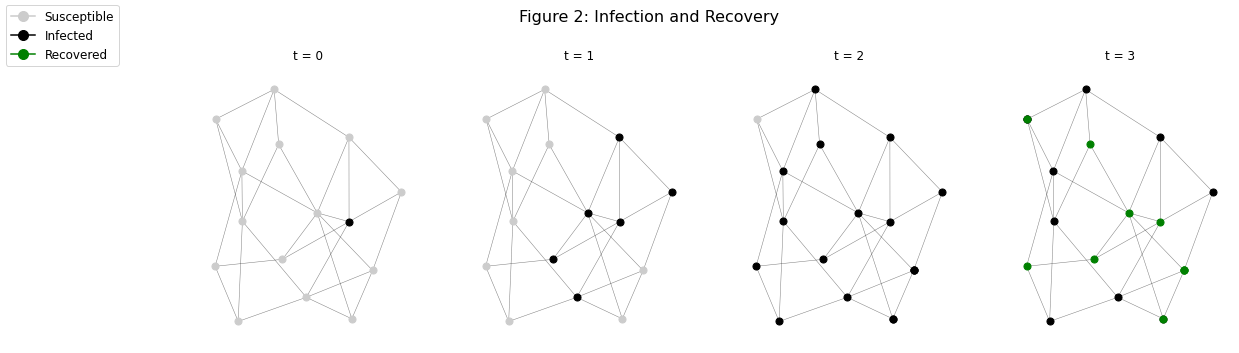

In [109]:
# Define the network (adjust number of nodes as needed)
G = nx.random_graphs.erdos_renyi_graph(15, 0.2)  # Fewer nodes for a clearer visualization

# Initialize the infection state
infected_nodes = [0]  # Start with one infected node

# Time steps for visualization
time_steps = 4

# Create separate figures for each plot with increased figure size

# First figure: Infection-only model
fig1, axs1 = plt.subplots(1, time_steps, figsize=(18, 6))  # Increased figure size

for t in range(time_steps):
    # Visualize the current state
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for a natural look
    nx.draw_networkx_nodes(G, pos, nodelist=infected_nodes, node_color='black', node_size=50, ax=axs1[t])
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes() if n not in infected_nodes], node_color='#cccccc', node_size=50, node_shape='o', ax=axs1[t])  # Light gray for susceptible nodes
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5, ax=axs1[t])

    # Update the infection state
    new_infected = []
    for node in infected_nodes:
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if neighbor not in infected_nodes:
                new_infected.append(neighbor)
    infected_nodes.extend(new_infected)

    axs1[t].set_title(f"t = {t}")
    axs1[t].axis('off')  # Remove axis labels and ticks

# Create custom legend handles for the first figure
susceptible_patch = mlines.Line2D([], [], color='#cccccc', marker='o', markersize=10, label='Susceptible')
infected_patch = mlines.Line2D([], [], color='black', marker='o', markersize=10, label='Infected')

# Add legend at the top-left corner for the first figure
fig1.legend(handles=[susceptible_patch, infected_patch], loc='upper left', fontsize=12, ncol=1)

# Set figure title and adjust layout
fig1.suptitle("Figure 1: Infection-only", fontsize=16)
fig1.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.2, hspace=0.3)

# Second figure: Infection and Recovery model
infected_nodes = [0]
recovered_nodes = []

fig2, axs2 = plt.subplots(1, time_steps, figsize=(18, 6))  # Increased figure size

for t in range(time_steps):
    # Visualize the current state
    nx.draw_networkx_nodes(G, pos, nodelist=infected_nodes, node_color='black', node_size=50, ax=axs2[t])
    nx.draw_networkx_nodes(G, pos, nodelist=recovered_nodes, node_color='green', node_size=50, ax=axs2[t], label="Recovered")  # Green for recovered nodes
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes() if n not in infected_nodes and n not in recovered_nodes], node_color='#cccccc', node_size=50, node_shape='o', ax=axs2[t])  # Light gray for susceptible nodes
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5, ax=axs2[t])

    # Update the infection and recovery states
    new_infected = []
    for node in infected_nodes:
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if neighbor not in infected_nodes and neighbor not in recovered_nodes:
                new_infected.append(neighbor)
    infected_nodes.extend(new_infected)

    # Recovery (adjust recovery time as needed)
    for node in infected_nodes:
        if t >= 2:
            recovered_nodes.append(node)
            infected_nodes.remove(node)

    axs2[t].set_title(f"t = {t}")
    axs2[t].axis('off')  # Remove axis labels and ticks

# Set figure title and adjust layout
fig2.suptitle("Figure 2: Infection and Recovery", fontsize=16)
fig2.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.2, hspace=0.3)  # Increased gap between subplots

# Create custom legend handles for the second figure
susceptible_patch = mlines.Line2D([], [], color='#cccccc', marker='o', markersize=10, label='Susceptible')
infected_patch = mlines.Line2D([], [], color='black', marker='o', markersize=10, label='Infected')
recovered_patch = mlines.Line2D([], [], color='green', marker='o', markersize=10, label='Recovered')

# Add legend at the top-left corner for the second figure
fig2.legend(handles=[susceptible_patch, infected_patch, recovered_patch], loc='upper left', fontsize=12, ncol=1)

# Show both figures
plt.show()


How nodes will recover is dependent upon the probability, it is also well explained in paper

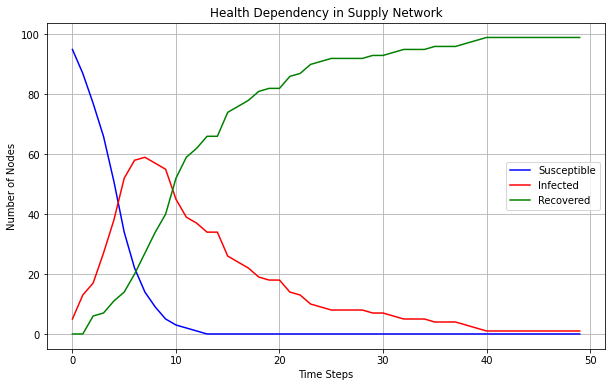

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters for the network
num_nodes = 100  # Total number of nodes
initial_infected = 5  # Number of initially infected nodes
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
time_steps = 50

# Create a random graph (small-world network)
G = nx.watts_strogatz_graph(num_nodes, k=4, p=0.3)

# Initialize states: 'S' for susceptible, 'I' for infected, 'R' for recovered
states = {node: 'S' for node in G.nodes()}
infected_nodes = np.random.choice(G.nodes(), initial_infected, replace=False)

for node in infected_nodes:
    states[node] = 'I'

# Function to update the state of the network
def update_network(G, states, beta, gamma):
    new_states = states.copy()
    for node in G.nodes():
        if states[node] == 'I':
            # Infect neighbors
            for neighbor in G.neighbors(node):
                if states[neighbor] == 'S' and np.random.rand() < beta:
                    new_states[neighbor] = 'I'
            # Recover after some time
            if np.random.rand() < gamma:
                new_states[node] = 'R'
    return new_states

# Store counts of susceptible, infected, and recovered over time
susceptible_count = []
infected_count = []
recovered_count = []

for t in range(time_steps):
    susceptible_count.append(sum(1 for state in states.values() if state == 'S'))
    infected_count.append(sum(1 for state in states.values() if state == 'I'))
    recovered_count.append(sum(1 for state in states.values() if state == 'R'))
    
    states = update_network(G, states, beta, gamma)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_count, label='Susceptible', color='blue')
plt.plot(infected_count, label='Infected', color='red')
plt.plot(recovered_count, label='Recovered', color='green')
plt.title('Health Dependency in Supply Network')
plt.xlabel('Time Steps')
plt.ylabel('Number of Nodes')
plt.legend()
plt.grid()
plt.show()

# CODE FOR SIMULATION

In [119]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [160]:
def generate_network_and_assign_health(n_nodes, average_degree, structure_type):
    # Create the network based on the structure type and controlled probabilities
    if structure_type == "random":
        p_random = average_degree / (n_nodes - 1)  # Approximate density control
        network = nx.erdos_renyi_graph(n_nodes, p=p_random)
    elif structure_type == "small-world":
        network = nx.watts_strogatz_graph(n_nodes, k=average_degree, p=0.5)  # Fixed rewiring for small-world structure
    elif structure_type == "scale-free":
        network = nx.barabasi_albert_graph(n_nodes, m=max(1, average_degree // 2))
    
    # Health states: Good (0), Moderate (1), Toxic (2)
    initial_health_dist = [0.8, 0.1, 0.1]
    infection_rate = 0.15
    recovery_rate = 0.05

    # Assign initial health states to nodes
    for node in network.nodes:
        network.nodes[node]['health'] = np.random.choice([0, 1, 2], p=initial_health_dist)
        network.nodes[node]['infection_rate'] = infection_rate
        network.nodes[node]['recovery_rate'] = recovery_rate
    
    return network


In [161]:
def update_health_state(node, network):
    health = network.nodes[node]['health']
    infection_rate = network.nodes[node]['infection_rate']
    recovery_rate = network.nodes[node]['recovery_rate']

    if health == 0:  # Good state
        toxic_neighbors = sum(1 for neighbor in network.neighbors(node) if network.nodes[neighbor]['health'] == 2)
        infection_chance = 1 - (1 - infection_rate) ** toxic_neighbors
        if random.random() < infection_chance:
            return 1  # Move to Moderate
    elif health == 1:  # Moderate state
        if random.random() < recovery_rate:
            return 0  # Recover to Good
        elif random.random() < infection_rate:
            return 2  # Deteriorate to Toxic
    elif health == 2:  # Toxic state
        if random.random() < recovery_rate:
            return 1  # Recover to Moderate

    return health  # No change if none of the conditions met


In [162]:
def simulate_health_evolution(n_nodes, average_degree, structure_type, num_iterations=40):
    # Generate network and assign initial health states
    network = generate_network_and_assign_health(n_nodes, average_degree, structure_type)

    health_counts = []
    for t in range(num_iterations):
        new_health_states = {}
        for node in network.nodes:
            new_health_states[node] = update_health_state(node, network)
        
        # Update the network with new health states
        nx.set_node_attributes(network, new_health_states, 'health')
        
        # Record health states for analysis
        health_distribution = [0, 0, 0]
        for node in network.nodes:
            health_distribution[network.nodes[node]['health']] += 1
        health_counts.append(health_distribution)
    
    return np.array(health_counts)

In [163]:
n_nodes = 500  # Number of nodes in the network
average_degree = 10  # Average degree for nodes
num_iterations = 40  # Number of time steps for the simulation

In [165]:
# Simulate health evolution for each network type and store results
results = {}
network_types = ['random', 'small-world', 'scale-free']

for structure_type in network_types:
    health_counts = simulate_health_evolution(n_nodes, average_degree, structure_type, num_iterations)
    
    avg_health_states = np.mean(health_counts, axis=0) / n_nodes
    stabilization_threshold = 0.01
    stabilized_time = None

    # Calculate time to stabilization
    for t in range(1, num_iterations):
        fluctuation = np.abs(health_counts[t] - health_counts[t - 1]) / n_nodes
        if all(f < stabilization_threshold for f in fluctuation):
            stabilized_time = t
            break

    # Store results for the current network type
    results[structure_type] = {
        "avg_good": avg_health_states[0],
        "avg_moderate": avg_health_states[1],
        "avg_toxic": avg_health_states[2],
        "stabilized_time": stabilized_time
    }

In [166]:
# Print results by network type
for structure_type, result in results.items():
    print(f"Results for {structure_type} network:")
    print("  Average Proportion of Good Nodes:", result["avg_good"])
    print("  Average Proportion of Moderate Nodes:", result["avg_moderate"])
    print("  Average Proportion of Toxic Nodes:", result["avg_toxic"])
    print("  Time to Stabilization:", result["stabilized_time"])
    print()


Results for random network:
  Average Proportion of Good Nodes: 0.12685
  Average Proportion of Moderate Nodes: 0.2899
  Average Proportion of Toxic Nodes: 0.58325
  Time to Stabilization: 21

Results for small-world network:
  Average Proportion of Good Nodes: 0.11120000000000001
  Average Proportion of Moderate Nodes: 0.31910000000000005
  Average Proportion of Toxic Nodes: 0.5697000000000001
  Time to Stabilization: 17

Results for scale-free network:
  Average Proportion of Good Nodes: 0.13775
  Average Proportion of Moderate Nodes: 0.31035
  Average Proportion of Toxic Nodes: 0.5519
  Time to Stabilization: 29



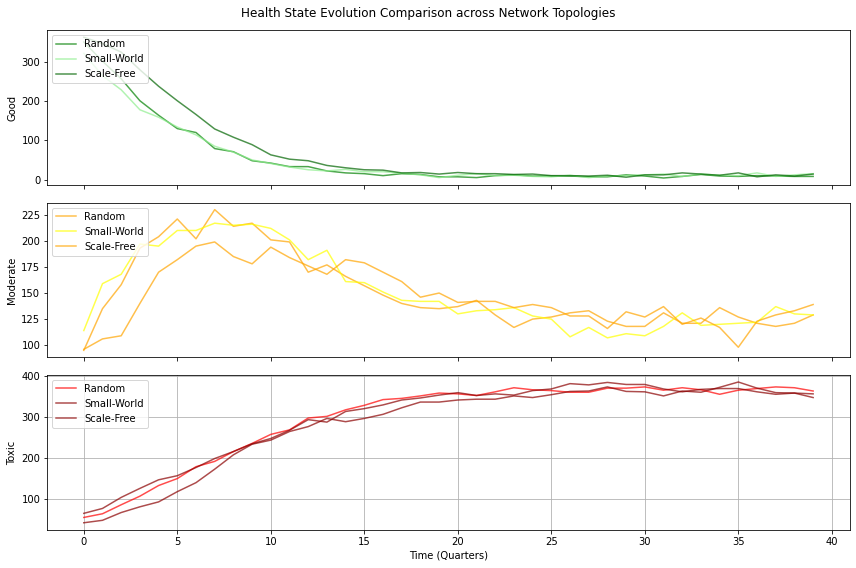

In [153]:
import matplotlib.pyplot as plt

# Assuming num_iterations is defined elsewhere

# Define transparency for lines to avoid overlapping
opacity = 0.7

# Create separate subplots for Good, Moderate, and Toxic states
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)  # Share x-axis

# Plot Good state
axes[0].plot(range(num_iterations), random_health_counts[:, 0], label='Random', color='green', alpha=opacity)
axes[0].plot(range(num_iterations), small_world_health_counts[:, 0], label='Small-World', color='lightgreen', alpha=opacity)
axes[0].plot(range(num_iterations), scale_free_health_counts[:, 0], label='Scale-Free', color='darkgreen', alpha=opacity)
axes[0].set_ylabel('Good')
axes[0].legend(loc='upper left')

# Plot Moderate state (optional: adjust y-axis limits if needed)
axes[1].plot(range(num_iterations), random_health_counts[:, 1], label='Random', color='orange', alpha=opacity)
axes[1].plot(range(num_iterations), small_world_health_counts[:, 1], label='Small-World', color='yellow', alpha=opacity)
axes[1].plot(range(num_iterations), scale_free_health_counts[:, 1], label='Scale-Free', color='orange', alpha=opacity)
axes[1].set_ylabel('Moderate')
axes[1].legend(loc='upper left')

# Plot Toxic state
axes[2].plot(range(num_iterations), random_health_counts[:, 2], label='Random', color='red', alpha=opacity)
axes[2].plot(range(num_iterations), small_world_health_counts[:, 2], label='Small-World', color='darkred', alpha=opacity)
axes[2].plot(range(num_iterations), scale_free_health_counts[:, 2], label='Scale-Free', color='darkred', alpha=opacity)
axes[2].set_ylabel('Toxic')
axes[2].set_xlabel('Time (Quarters)')  # Move x-axis label to bottom subplot
axes[2].legend(loc='upper left')

# Formatting the plot
fig.suptitle(f'Health State Evolution Comparison across Network Topologies')
plt.grid(True)
plt.tight_layout()
plt.show()

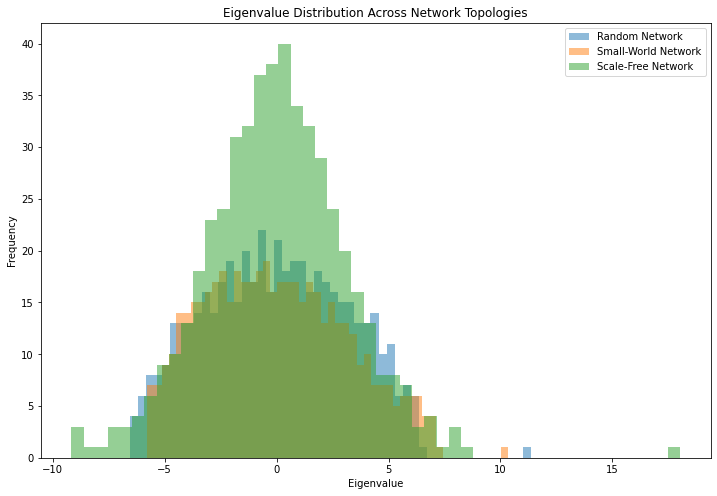

In [154]:
def spectral_analysis(network):
    adj_matrix = nx.adjacency_matrix(network).todense()
    eigenvalues = np.linalg.eigvals(adj_matrix)
    return eigenvalues

# Spectral analysis for each network
random_eigenvalues = spectral_analysis(nx.erdos_renyi_graph(n_nodes, p=average_degree / n_nodes))
small_world_eigenvalues = spectral_analysis(nx.watts_strogatz_graph(n_nodes, k=average_degree, p=0.5))
scale_free_eigenvalues = spectral_analysis(nx.barabasi_albert_graph(n_nodes, m=average_degree // 2))

# Plotting eigenvalues
plt.figure(figsize=(12, 8))
plt.hist(random_eigenvalues, bins=50, alpha=0.5, label="Random Network")
plt.hist(small_world_eigenvalues, bins=50, alpha=0.5, label="Small-World Network")
plt.hist(scale_free_eigenvalues, bins=50, alpha=0.5, label="Scale-Free Network")
plt.legend()
plt.title("Eigenvalue Distribution Across Network Topologies")
plt.xlabel('Eigenvalue')
plt.ylabel('Frequency')
plt.show()


* Disease spreading or information diffusion in random networks can be slow because of the lack of hubs and the scattered nature of connectivity.
* Disease or information spread can be faster than in random networks due to these long-range edges, even though there is no central hub like in scale-free networks.
* The large difference between the largest and second-largest eigenvalues implies that these networks can experience rapid spread of information or diseases in case of scale free network, as hubs act as amplifiers.These networks are also more resilient to random node failures but can be vulnerable to targeted attacks (removal of hubs).

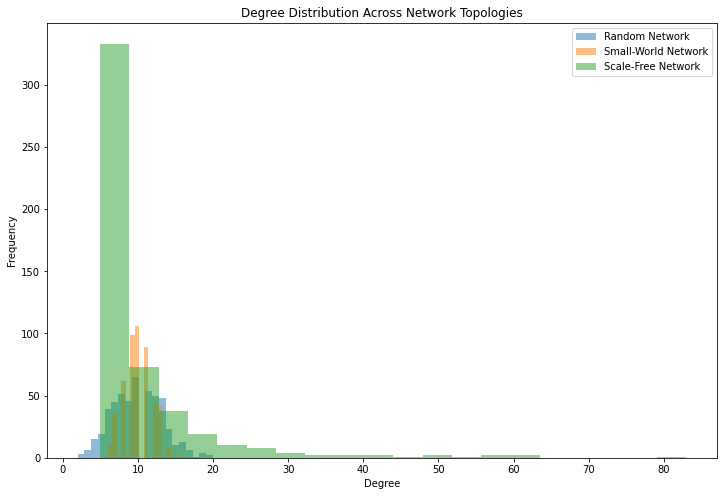

In [155]:
def degree_distribution(network):
    degrees = [degree for node, degree in network.degree()]
    return degrees

# Get degree distributions for each network
random_degrees = degree_distribution(nx.erdos_renyi_graph(n_nodes, p=average_degree / n_nodes))
small_world_degrees = degree_distribution(nx.watts_strogatz_graph(n_nodes, k=average_degree, p=0.5))
scale_free_degrees = degree_distribution(nx.barabasi_albert_graph(n_nodes, m=average_degree // 2))

# Plotting degree distributions
plt.figure(figsize=(12, 8))
plt.hist(random_degrees, bins=20, alpha=0.5, label="Random Network")
plt.hist(small_world_degrees, bins=20, alpha=0.5, label="Small-World Network")
plt.hist(scale_free_degrees, bins=20, alpha=0.5, label="Scale-Free Network")
plt.legend()
plt.title("Degree Distribution Across Network Topologies")
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [156]:
def clustering_coefficient(network):
    return nx.average_clustering(network)

# Clustering coefficient for each network
random_clustering = clustering_coefficient(nx.erdos_renyi_graph(n_nodes, p=average_degree / n_nodes))
small_world_clustering = clustering_coefficient(nx.watts_strogatz_graph(n_nodes, k=average_degree, p=0.5))
scale_free_clustering = clustering_coefficient(nx.barabasi_albert_graph(n_nodes, m=average_degree // 2))

print(f"Random Network Clustering: {random_clustering}")
print(f"Small-World Network Clustering: {small_world_clustering}")
print(f"Scale-Free Network Clustering: {scale_free_clustering}")


Random Network Clustering: 0.017871092031463545
Small-World Network Clustering: 0.10373491508491524
Scale-Free Network Clustering: 0.06936272480104065
